In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
import re
import pickle

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

# classifiers
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
#from catboost import CatBoostClassifier

In [4]:
df=pd.read_csv("230PatientsCOPD.csv")

In [5]:
df.head()

,ID Number\n,Age,Gender,"BMI, kg/m2",Height/m,COPD GOLD,History of Heart Failure,Location,working place,mMRC,...,Vaccination,Depression,Dependent,Temperature,Respiratory Rate,Heart Rate,Blood pressure,Oxygen Saturation,Sputum,FEV1
0,1,47.0,Male,21<BMI<25,1.65,1.0,Non,Barcelona,1.0,0.0,...,Non,Non,Non,Low,13.0,Higher,Normal,0.97,Normal,80% or above
1,2,60.0,Female,<21 kg/m2,1.78,3.0,Non,Barcelona,4.0,3.0,...,Non,Yes,Non,Normal,18.0,Higher,Stage1,0.95,Purulent,30–49%
2,3,55.0,Female,30 ≥BMI <35,1.78,4.0,Yes,Barcelona,3.0,4.0,...,Non,Yes,Non,High,24.0,Normal,Crisis,0.89,Purulent,29% or less
3,4,78.0,Male,25≥ BMI <30,1.98,2.0,Non,Barcelona,1.0,1.0,...,Non,Non,Non,Low,15.0,Higher,Normal,0.98,Normal,50–79%
4,5,71.0,Male,30 ≥BMI <35,1.83,4.0,Yes,Barcelona,3.0,4.0,...,Yes,Non,Non,High,22.0,Lower,Crisis,0.88,Purulent,29% or less


In [6]:
df.drop(columns=['ID Number\n'],inplace=True)

In [7]:
df.head()

,Age,Gender,"BMI, kg/m2",Height/m,COPD GOLD,History of Heart Failure,Location,working place,mMRC,status of smoking,...,Vaccination,Depression,Dependent,Temperature,Respiratory Rate,Heart Rate,Blood pressure,Oxygen Saturation,Sputum,FEV1
0,47.0,Male,21<BMI<25,1.65,1.0,Non,Barcelona,1.0,0.0,3.0,...,Non,Non,Non,Low,13.0,Higher,Normal,0.97,Normal,80% or above
1,60.0,Female,<21 kg/m2,1.78,3.0,Non,Barcelona,4.0,3.0,1.0,...,Non,Yes,Non,Normal,18.0,Higher,Stage1,0.95,Purulent,30–49%
2,55.0,Female,30 ≥BMI <35,1.78,4.0,Yes,Barcelona,3.0,4.0,1.0,...,Non,Yes,Non,High,24.0,Normal,Crisis,0.89,Purulent,29% or less
3,78.0,Male,25≥ BMI <30,1.98,2.0,Non,Barcelona,1.0,1.0,2.0,...,Non,Non,Non,Low,15.0,Higher,Normal,0.98,Normal,50–79%
4,71.0,Male,30 ≥BMI <35,1.83,4.0,Yes,Barcelona,3.0,4.0,1.0,...,Yes,Non,Non,High,22.0,Lower,Crisis,0.88,Purulent,29% or less


In [8]:
df.shape

(240, 21)

In [9]:
df.isnull().sum()

Age                         10
Gender                      10
BMI, kg/m2                  10
Height/m                    10
COPD GOLD                   10
History of Heart Failure    10
Location                    10
working place               10
mMRC                        10
status of smoking           10
Pack History                10
Vaccination                 10
Depression                  10
Dependent                   10
Temperature                 10
Respiratory Rate            10
Heart Rate                  10
Blood pressure              10
Oxygen Saturation           10
Sputum                      10
FEV1                        10
dtype: int64

In [10]:
df.dtypes

Age                         float64
Gender                       object
BMI, kg/m2                   object
Height/m                    float64
COPD GOLD                   float64
History of Heart Failure     object
Location                     object
working place               float64
mMRC                        float64
status of smoking           float64
Pack History                float64
Vaccination                  object
Depression                   object
Dependent                    object
Temperature                  object
Respiratory Rate            float64
Heart Rate                   object
Blood pressure               object
Oxygen Saturation           float64
Sputum                       object
FEV1                         object
dtype: object

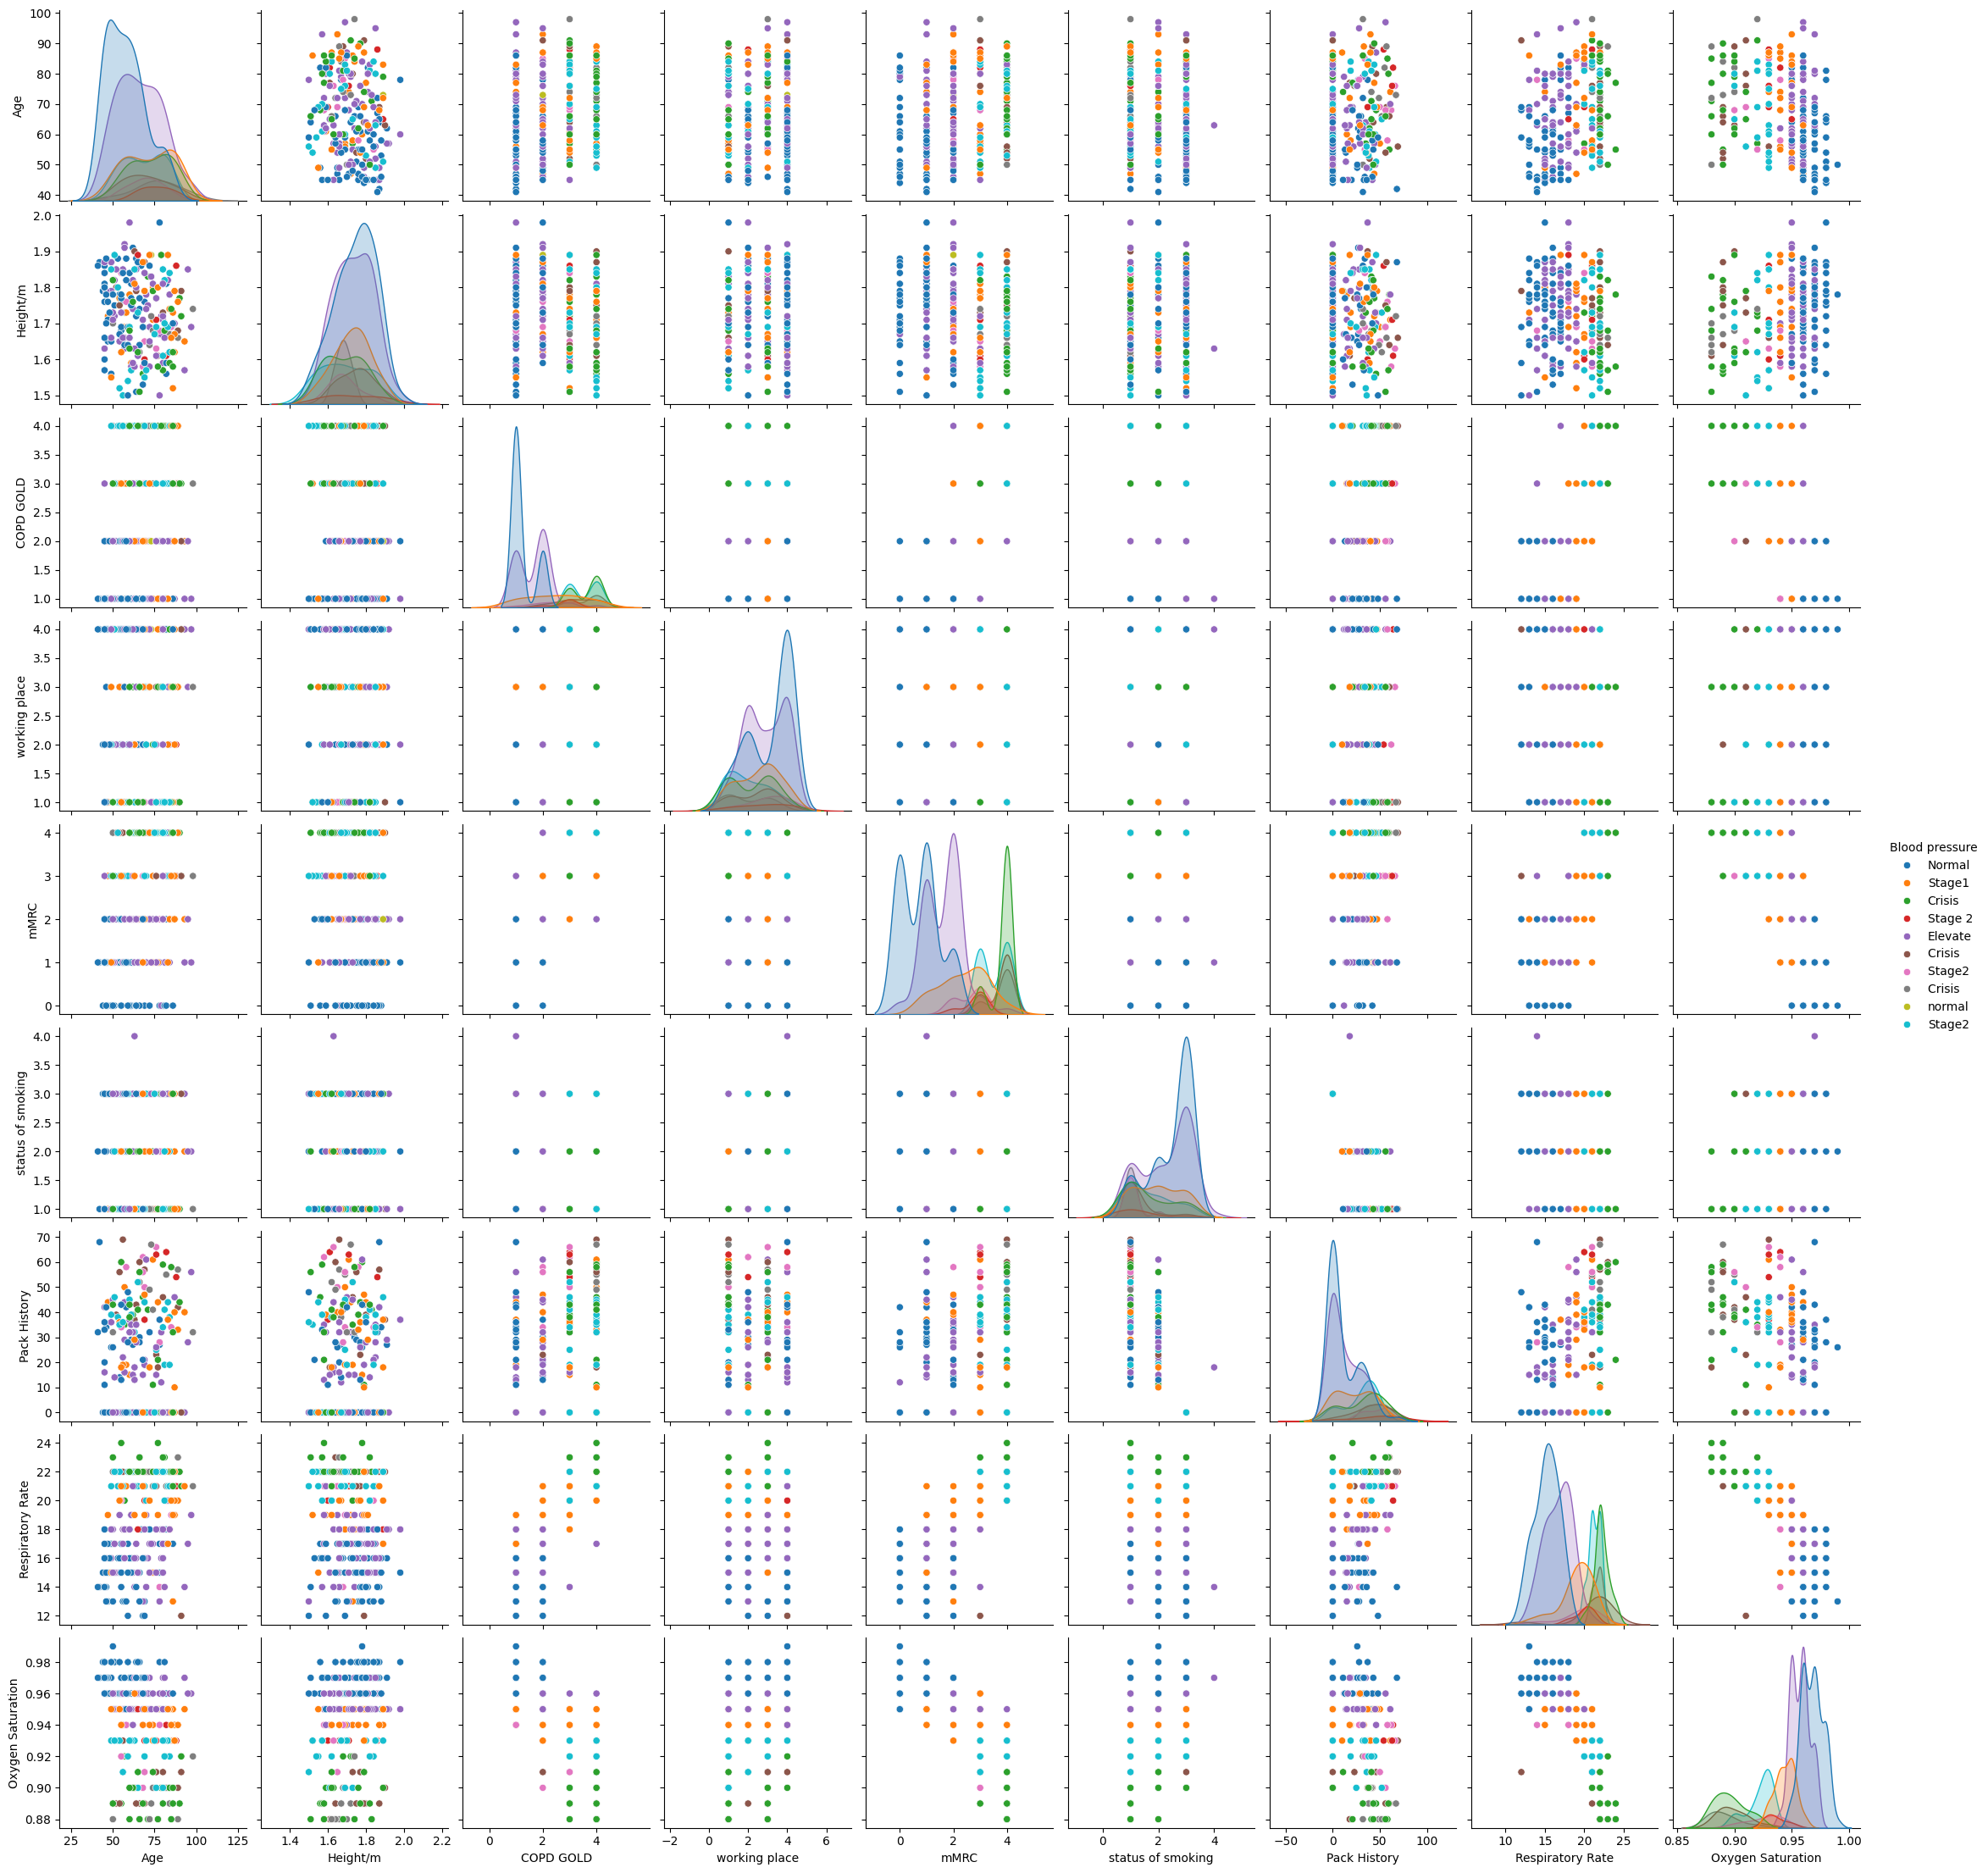

In [11]:
sns.pairplot(df, hue="Blood pressure")
plt.show()

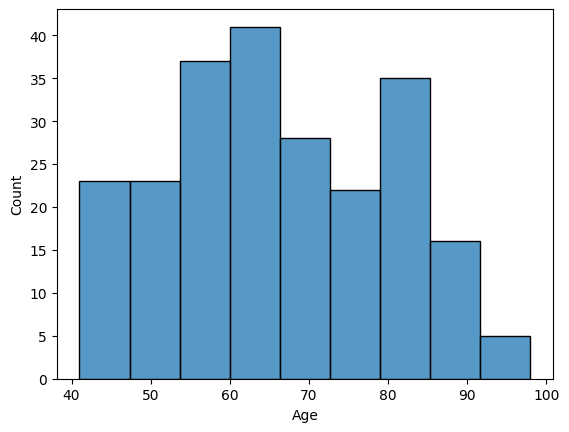

In [12]:
sns.histplot(x=df['Age'])
plt.show()

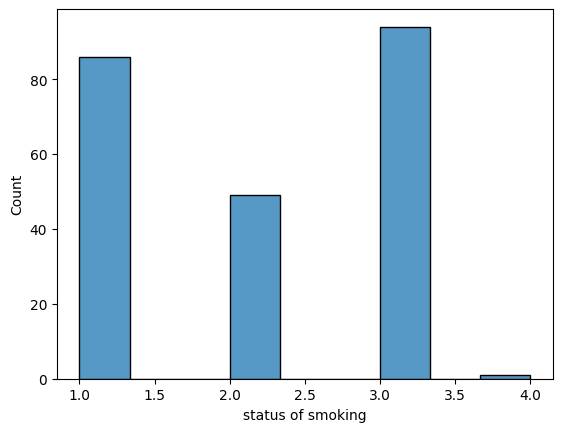

In [13]:
sns.histplot(x=df['status of smoking'])
plt.show()

In [14]:
df.columns = df.columns.str.strip()

# Show all column names
print(df.columns.tolist())

['Age', 'Gender', 'BMI, kg/m2', 'Height/m', 'COPD GOLD', 'History of Heart Failure', 'Location', 'working place', 'mMRC', 'status of smoking', 'Pack History', 'Vaccination', 'Depression', 'Dependent', 'Temperature', 'Respiratory Rate', 'Heart Rate', 'Blood pressure', 'Oxygen Saturation', 'Sputum', 'FEV1']


In [15]:
categorical_cols = ['Gender', 'History of Heart Failure', 'Location', 
                    'Vaccination', 'Depression', 'Dependent', 'Temperature', 
                    'Heart Rate', 'Blood pressure', 'Sputum', 'FEV1']

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

    Age    BMI, kg/m2  Height/m  COPD GOLD  working place  mMRC  \
0  47.0     21<BMI<25      1.65        1.0            1.0   0.0   
1  60.0     <21 kg/m2      1.78        3.0            4.0   3.0   
2  55.0  30 ≥BMI <35       1.78        4.0            3.0   4.0   
3  78.0   25≥ BMI <30      1.98        2.0            1.0   1.0   
4  71.0   30 ≥BMI <35      1.83        4.0            3.0   4.0   

   status of smoking  Pack History  Respiratory Rate  Oxygen Saturation  ...  \
0                3.0           0.0              13.0               0.97  ...   
1                1.0          15.0              18.0               0.95  ...   
2                1.0          60.0              24.0               0.89  ...   
3                2.0          37.0              15.0               0.98  ...   
4                1.0          41.0              22.0               0.88  ...   

   Blood pressure_Stage2   Blood pressure_normal  Sputum_Purlent  \
0                   False                  False

In [17]:
X = df.drop(columns=['COPD GOLD', 'Location', 'working place'])
y = df['COPD GOLD']


In [18]:
print(y.isnull().sum())
print(y.unique())


10
[ 1.  3.  4.  2. nan]


In [19]:
X = df_encoded.drop("COPD GOLD", axis=1)   # example target
y = df_encoded["COPD GOLD"]


In [20]:
# Check and drop/impute NaN in target
print("Missing in target:", df_encoded["COPD GOLD"].isnull().sum())

# Drop rows with missing target
df_encoded = df_encoded.dropna(subset=["COPD GOLD"])

# Reset index after dropping
df_encoded = df_encoded.reset_index(drop=True)

# Separate X, y again
X = df_encoded.drop("COPD GOLD", axis=1)
y = df_encoded["COPD GOLD"]


Missing in target: 10


In [21]:
le = LabelEncoder()
df_encoded['BMI, kg/m2'] = le.fit_transform(df_encoded['BMI, kg/m2'])
#df_encoded['FEV1'] = le.fit_transform(df_encoded['FEV1'])

In [22]:

df = df.dropna(subset=['COPD GOLD'])
df = df.reset_index(drop=True)
y = df['COPD GOLD'].fillna(df['COPD GOLD'].median())
# Ensure X and y have the same length
print(len(X), len(y))

# If y is the target column
y = df['COPD GOLD']  # replace with your actual target column
X = df.drop(columns=['COPD GOLD',])  # drop target & ID

print(len(X), len(y))  # should both be 240 (or same number)




230 230
230 230


In [23]:
y.shape
print(df['COPD GOLD'].isna().sum())
print(df.isna().sum())


0
Age                         0
Gender                      0
BMI, kg/m2                  0
Height/m                    0
COPD GOLD                   0
History of Heart Failure    0
Location                    0
working place               0
mMRC                        0
status of smoking           0
Pack History                0
Vaccination                 0
Depression                  0
Dependent                   0
Temperature                 0
Respiratory Rate            0
Heart Rate                  0
Blood pressure              0
Oxygen Saturation           0
Sputum                      0
FEV1                        0
dtype: int64


In [24]:
def bmi_to_number(bmi_str):
    bmi_str = str(bmi_str).strip()  # remove extra spaces
    if '<21' in bmi_str:
        return 20
    elif '21<BMI<25' in bmi_str:
        return (21 + 25) / 2
    elif '25≥ BMI <30' in bmi_str:
        return (25 + 30) / 2
    elif '30 ≥BMI <35' in bmi_str:
        return (30 + 35) / 2
    elif '≥35' in bmi_str:
        return 37
    else:
        # Try to extract numbers using regex
        nums = re.findall(r"\d+\.?\d*", bmi_str)
        if len(nums) == 2:
            return (float(nums[0]) + float(nums[1])) / 2
        elif len(nums) == 1:
            return float(nums[0])
        else:
            return np.nan

# Apply function
df['BMI, kg/m2'] = df['BMI, kg/m2'].apply(bmi_to_number)

# Check
print(df['BMI, kg/m2'].head())

0    23.0
1    20.0
2    32.5
3    27.5
4    32.5
Name: BMI, kg/m2, dtype: float64


In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_encoded)
X_test_scaled = scaler.transform(df_encoded)



In [28]:
# param_grids = {
#     "Random Forest": {
#         'n_estimators': [100, 300, 500],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     "Logistic Regression": {
#         'C': [0.1, 1, 10],
#         'penalty': ['l2']
#     },
#     "Gradient Boosting": {
#         'n_estimators': [100, 300, 500],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'max_depth': [3, 5, 6]
#     }
    
# }
gb_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)




In [29]:
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     #"CatBoost":  CatBoostClassifier(
    
# }
# results={}


gb_model.fit(x_train, y_train) 

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=500,
                           random_state=42)

In [30]:
y_pred = gb_model.predict(x_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


Gradient Boosting Accuracy: 100.00%


In [31]:
import os
print(os.getcwd())


C:\Users\hp\OneDrive\Desktop\COPD Project Machine Learning\anaconda_projects\db


In [32]:
with open("gradient_boost_model.pkl", "wb") as f:
    pickle.dump(gb_model, f)
    print("model successfully loaded")

model successfully loaded


In [33]:
# for name, model in models.items():
#     print(f"\n🔹 Training {name}...")
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     acc = accuracy_score(y_test, y_pred)
#     results[name] = acc

In [34]:
# print("\n Model Accuracies:")
# for name, acc in results.items():
#     print(f"{name}: {acc:.4f}")

In [35]:
# import pickle
# import os

# # Absolute path to your model
# model_path = r"C:\Users\hp\OneDrive\Desktop\COPD Project Machine Learning\anaconda_projects\db\my_model.pkl"

# # Check if the file exists
# if not os.path.exists(model_path):
#     raise FileNotFoundError(f"Model file not found at {model_path}")

# # Load the model
# with open(model_path, "rb") as f:
#     model = pickle.load(f)

# print("Model loaded successfully!")


In [36]:
import os
print(os.getcwd())


C:\Users\hp\OneDrive\Desktop\COPD Project Machine Learning\anaconda_projects\db


In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Define feature groups
numeric_features = ['Age', 'BMI_kg_m2', 'Height_m', 'Pack_History', 'Temperature',
                    'Respiratory_Rate', 'Heart_Rate', 'Oxygen_Saturation']
categorical_features = ['Gender', 'History_of_Heart_Failure', 'Location', 
                        'working_place', 'mMRC', 'status_of_smoking', 
                        'Vaccination', 'Depression', 'Dependent', 'Sputum']
binned_features = ['FEV1']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
binned_transformer = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binned_transformer, binned_features)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Example training data
x_train = pd.DataFrame([
    {
        "Age": 55, "BMI_kg_m2": 24.5, "Height_m": 1.70, "Gender": 1, "COPD_GOLD": 1,
        "History_of_Heart_Failure": 0, "Location": 1, "working_place": 1, "mMRC": 1,
        "status_of_smoking": 1, "Pack_History": 10, "Vaccination": 1, "Depression": 0,
        "Dependent": 0, "Temperature": 36.8, "Respiratory_Rate": 18, "Heart_Rate": 78,
        "Blood_pressure": 120, "Oxygen_Saturation": 0.95, "Sputum": 0, "FEV1": 85.0
    },
    {
        "Age": 65, "BMI_kg_m2": 20.0, "Height_m": 1.68, "Gender": 0, "COPD_GOLD": 3,
        "History_of_Heart_Failure": 1, "Location": 2, "working_place": 1, "mMRC": 3,
        "status_of_smoking": 1, "Pack_History": 40, "Vaccination": 1, "Depression": 1,
        "Dependent": 1, "Temperature": 37.5, "Respiratory_Rate": 22, "Heart_Rate": 92,
        "Blood_pressure": 135, "Oxygen_Saturation": 0.85, "Sputum": 1, "FEV1": 42.0
    }
])

# Example labels
y_train = pd.Series([1, 3])

# Fit pipeline
pipeline.fit(x_train, y_train)

# Save full pipeline
pickle.dump(pipeline, open('full_pipeline.pkl', 'wb'))


In [38]:
print(df.head())


    Age  Gender  BMI, kg/m2  Height/m  COPD GOLD History of Heart Failure  \
0  47.0    Male        23.0      1.65        1.0                      Non   
1  60.0  Female        20.0      1.78        3.0                      Non   
2  55.0  Female        32.5      1.78        4.0                      Yes   
3  78.0    Male        27.5      1.98        2.0                      Non   
4  71.0    Male        32.5      1.83        4.0                      Yes   

    Location  working place  mMRC  status of smoking  ...  Vaccination  \
0  Barcelona            1.0   0.0                3.0  ...          Non   
1  Barcelona            4.0   3.0                1.0  ...          Non   
2  Barcelona            3.0   4.0                1.0  ...          Non   
3  Barcelona            1.0   1.0                2.0  ...          Non   
4  Barcelona            3.0   4.0                1.0  ...          Yes   

  Depression Dependent Temperature Respiratory Rate  Heart Rate  \
0        Non       Non   

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

# After fitting pipeline


import pandas as pd
import pickle

# Load full pipeline (preprocessing + model)
import joblib

# After creating/training your pipeline


# Example patient input (use same aliases as your training DataFrame)
patient_input = {
    
  
  
 
 
  "Age": 75,
  "Gender": 0,
  "BMI_kg_m2": 17.0,
  "Height_m": 1.60,
  "History_of_Heart_Failure": 1,
  "Location": 2,
  "working_place": 0,
  "mMRC": 4,
  "status_of_smoking": 1,
  "Pack_History": 60,
  "Vaccination": 1,
  "Depression": 1,
  "Dependent": 1,
  "Temperature": 38.0,
  "Respiratory_Rate": 28,
  "Heart_Rate": 105,
  "Blood_pressure": 145,
  "Oxygen_Saturation": 0.78,
  "Sputum": 1,
  "FEV1": 25.0
}










# Convert to DataFrame
df = pd.DataFrame([patient_input])

# Predict using pipeline
prediction_value = pipeline.predict(df)[0]

stage_map = {
    1: "Mild COPD (GOLD 1)",
    2: "Moderate COPD (GOLD 2)",
    3: "Severe COPD (GOLD 3)",
    4: "Very Severe COPD (GOLD 4)"
}

result = stage_map.get(prediction_value, "Unknown")
print("Prediction:", result)
joblib.dump(pipeline, "full_pipeline.joblib")
print("Pipeline saved successfully as full_pipeline.joblib")

import os

# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# List all files in the current directory
print("Files in directory:", os.listdir(cwd))

import joblib

# Assuming 'pipeline' is your trained full pipeline
joblib.dump(pipeline, "full_pipeline.joblib")  # This will save in cwd


In [ ]:
print("Classes in model:", model.classes_)


In [ ]:
df.columns.tolist()

In [ ]:
# Suppose your training DataFrame was X_train
print(list(x_train.columns))
